### Initial setup

In [40]:
#Import libraries
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import missingno as msno

print("Packages uploaded successfully!")

Packages uploaded successfully!


In [41]:
#Read dataset
data = pd.read_csv('./machine_readable_dnt.csv')

In [42]:
#Check first five rows
data.head(5)

,Chemical,CASRN,DNT,SLogP,BBB,Cbrain/Cblood,Pgp_inhibition,Pgp_substrate,Pgp_active,"BDNF, Reduction",Activity_Syn,Syn_EC30,Viability_EC30,Activity_NNF,NNF EC50min,NNF EC50max,Viability_LDH
0,5-Fluorouracil,51-21-8,1,-0.7977,1.0,0.199528,0.0,0.0,0.0,1.0,1.0,0.0,91.8,1.0,0.46,5.03,3.37
1,Acrylamide,79-06-1,1,-0.3423,1.0,0.380063,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,8.26,11.30,0.00
2,Aldicarb,116-06-3,1,1.4698,1.0,0.609681,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.66,9.88,0.00
3,Aminonicotinamide,329-89-5,1,-0.2373,1.0,0.212859,0.0,0.0,0.0,NaN,1.0,7.9,6.7,1.0,3.18,9.85,6.27
4,Bisphenol A,80-05-7,1,3.4237,1.0,6.030440,0.0,0.0,0.0,1.0,1.0,33.9,95.0,1.0,1.01,25.17,0.00


In [43]:
#Statistical summary
data.describe()

,DNT,SLogP,BBB,Cbrain/Cblood,Pgp_inhibition,Pgp_substrate,Pgp_active,"BDNF, Reduction",Activity_Syn,Syn_EC30,Viability_EC30,Activity_NNF,NNF EC50min,NNF EC50max,Viability_LDH
count,97.000000,95.000000,93.000000,87.000000,91.000000,91.000000,91.000000,37.000000,67.000000,67.000000,67.000000,86.000000,86.000000,86.000000,79.000000
mean,0.752577,1.942219,0.870968,2.179086,0.153846,0.065934,0.175824,0.594595,0.522388,6.077761,7.157015,0.744186,4.154419,33.273721,41.174810
std,0.433756,3.159165,0.337053,3.948392,0.362800,0.249542,0.382780,0.497743,0.503268,11.874245,17.468629,0.438877,20.399918,214.138809,332.030848
min,0.000000,-5.994500,0.000000,0.008951,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.080800,1.000000,0.349445,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.002500,0.007500,0.000000
50%,1.000000,1.867700,1.000000,0.798734,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.105000,6.510000,0.000000
75%,1.000000,4.443850,1.000000,1.598055,0.000000,0.000000,0.000000,1.000000,1.000000,7.100000,5.850000,1.000000,1.307500,21.907500,2.125000
max,1.000000,9.694600,1.000000,23.155500,1.000000,1.000000,1.000000,1.000000,1.000000,51.900000,95.000000,1.000000,186.850000,1993.650000,2954.160000


### Distribution of categorical variables

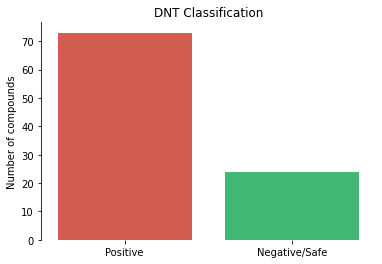

In [5]:
#DNT
replace_values = {0 : 'Negative/Safe', 1 : 'Positive'}
dnt = data.replace({"DNT": replace_values})
#sns.set_palette("Set3") #or pastel
#sns.set_palette("Reds")
my_palette = ["#e74c3c", "#2ecc71"]
sns.set_palette(sns.color_palette(my_palette))
ax = sns.countplot(x="DNT", data=dnt)
ax.set(ylabel='Number of compounds', xlabel=None, title ='DNT Classification')
sns.despine(right=True, bottom = True)

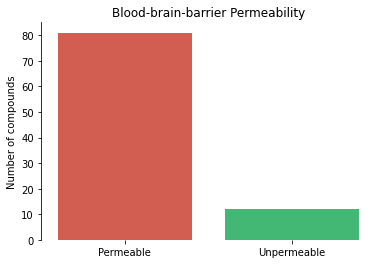

In [6]:
#BBB
replace_values_bbb = {0 : 'Unpermeable', 1 : 'Permeable'}
bbb = data.replace({"BBB": replace_values_bbb})
my_palette = ["#e74c3c", "#2ecc71"]
sns.set_palette(sns.color_palette(my_palette))
ax = sns.countplot(x="BBB", data=bbb)
ax.set(ylabel='Number of compounds', xlabel=None, title ='Blood-brain-barrier Permeability')
sns.despine(right=True, bottom = True)

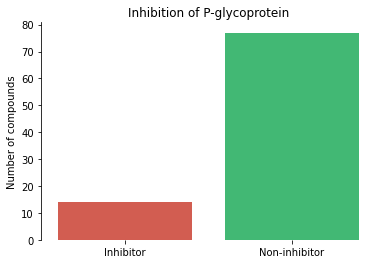

In [7]:
#Pgp_inhibition
replace_values_pgp_inh = {1 : 'Inhibitor', 0 : 'Non-inhibitor'}
pgp_inh = data.replace({"Pgp_inhibition": replace_values_pgp_inh})
my_palette = ["#e74c3c", "#2ecc71" ]
sns.set_palette(sns.color_palette(my_palette))
ax = sns.countplot(x="Pgp_inhibition", data=pgp_inh, order = ["Inhibitor", "Non-inhibitor"])
ax.set(ylabel='Number of compounds', xlabel=None, title ='Inhibition of P-glycoprotein')
sns.despine(right=True, bottom = True)

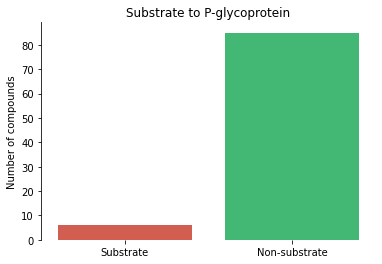

In [8]:
#Pgp_substrate
replace_values_pgp_subs = {0 : 'Non-substrate', 1 : 'Substrate'}
pgp_subs = data.replace({"Pgp_substrate": replace_values_pgp_subs})
my_palette = ["#e74c3c","#2ecc71"]
sns.set_palette(sns.color_palette(my_palette))
ax = sns.countplot(x="Pgp_substrate", data=pgp_subs, order = ["Substrate", "Non-substrate"])
ax.set(ylabel='Number of compounds', xlabel=None, title ='Substrate to P-glycoprotein')
sns.despine(right=True, bottom = True)

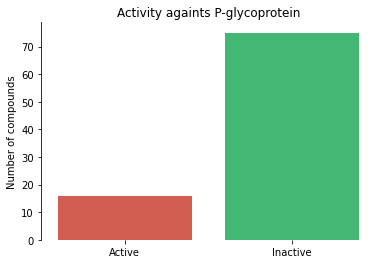

In [9]:
#Pgp_active
replace_values_pgp_act = {0 : 'Inactive', 1 : 'Active'}
pgp_act = data.replace({"Pgp_active": replace_values_pgp_act})
my_palette = ["#e74c3c", "#2ecc71"]
sns.set_palette(sns.color_palette(my_palette))
ax = sns.countplot(x="Pgp_active", data=pgp_act, order = ["Active", "Inactive"])
ax.set(ylabel='Number of compounds', xlabel=None, title ='Activity againts P-glycoprotein')
sns.despine(right=True, bottom = True)

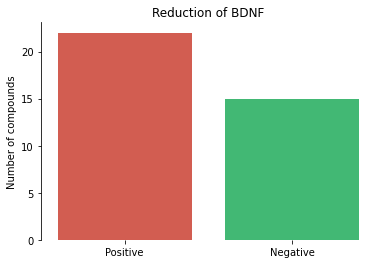

In [10]:
#BDNF, Reduction
replace_values_bdnf = {0 : 'Negative', 1 : 'Positive'}
bdnf = data.replace({"BDNF, Reduction": replace_values_bdnf})
my_palette = ["#e74c3c", "#2ecc71"]
sns.set_palette(sns.color_palette(my_palette))
ax = sns.countplot(x="BDNF, Reduction", data=bdnf)
ax.set(ylabel='Number of compounds', xlabel=None, title ='Reduction of BDNF')
sns.despine(right=True, bottom = True)

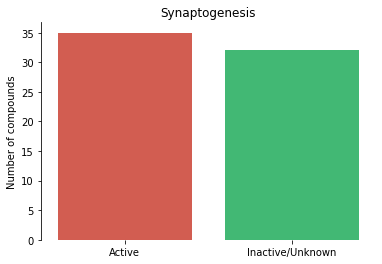

In [11]:
#Activity_Syn
replace_values_syn = {0 : 'Inactive/Unknown', 1: 'Active'}
syn = data.replace({"Activity_Syn": replace_values_syn})
my_palette = ["#e74c3c", "#2ecc71"]
sns.set_palette(sns.color_palette(my_palette))
ax = sns.countplot(x="Activity_Syn", data=syn, order=[ "Active", "Inactive/Unknown"] )
ax.set(ylabel='Number of compounds', xlabel=None, title ='Synaptogenesis')
sns.despine(right=True, bottom = True)

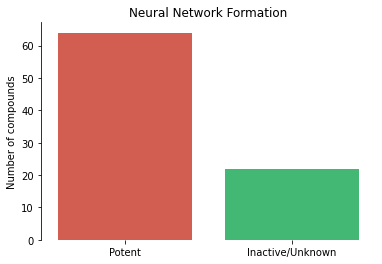

In [12]:
#Activity_NNF
replace_values_nnf = {0 : 'Inactive/Unknown', 1 : 'Potent'}
nnf = data.replace({"Activity_NNF": replace_values_nnf})
my_palette = ["#e74c3c", "#2ecc71"]
sns.set_palette(sns.color_palette(my_palette))
ax = sns.countplot(x="Activity_NNF", data=nnf, order = ["Potent", "Inactive/Unknown"])
ax.set(ylabel='Number of compounds', xlabel=None, title ='Neural Network Formation')
sns.despine(right=True, bottom = True)

### Distribution of continuous variables

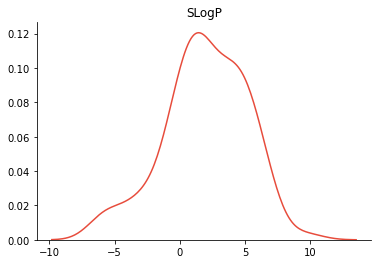

In [13]:
#SLogP
ax = sns.kdeplot(data['SLogP'], legend = False)
ax.set(xlabel = None, ylabel = None, title ='SLogP')
sns.despine(right=True, bottom = False)

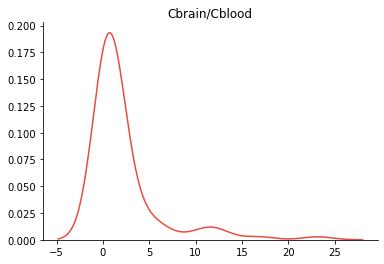

In [14]:
#Cbrain/Cblood
ax = sns.kdeplot(data['Cbrain/Cblood'], legend=False)
ax.set(xlabel = None, ylabel = None, title ='Cbrain/Cblood')
sns.despine(right=True)

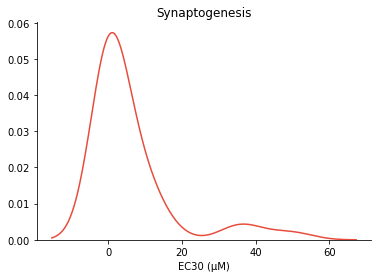

In [15]:
#Syn_EC30
ax = sns.kdeplot(data['Syn_EC30'], legend=False)
ax.set(ylabel = None, xlabel = 'EC30 (μM)', title ='Synaptogenesis')
sns.despine(right=True)

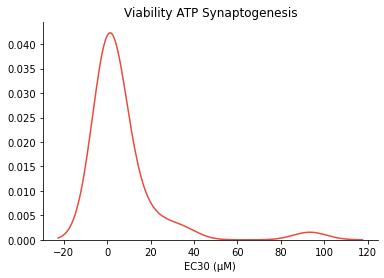

In [16]:
#Viability_EC30
ax = sns.kdeplot(data['Viability_EC30'], legend=False)
ax.set(ylabel = None, xlabel = 'EC30 (μM)', title ='Viability ATP Synaptogenesis')
sns.despine(right=True)

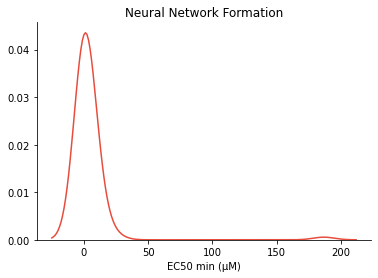

In [17]:
#NNF EC50min
ax = sns.kdeplot(data['NNF EC50min'], legend=False)
ax.set(ylabel = None, xlabel = 'EC50 min (μM)', title ='Neural Network Formation')
sns.despine(right=True)

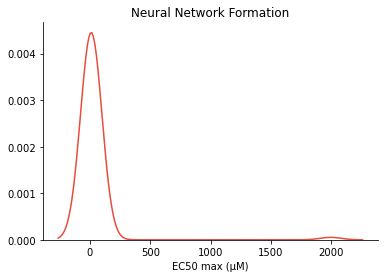

In [19]:
#NNF EC50max
ax = sns.kdeplot(data['NNF EC50max'], legend=False)
ax.set(ylabel = None, xlabel = 'EC50 max (μM)', title ='Neural Network Formation')
sns.despine(right=True)

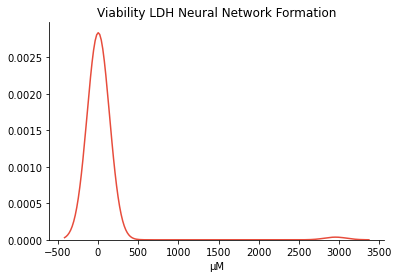

In [20]:
#Viability_LDH
ax = sns.kdeplot(data['Viability_LDH'], legend=False)
ax.set(ylabel = None, xlabel = 'μM', title ='Viability LDH Neural Network Formation')
sns.despine(right=True)

### Correlations

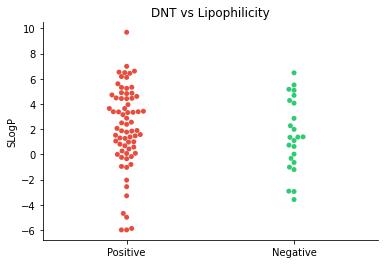

In [21]:
# DNT vs SLogP
replace_values_dnt_slogp = {0 : 'Negative', 1 : 'Positive'}
dnt_slogp = data.replace({"DNT": replace_values_dnt_slogp})
my_palette = ["#e74c3c", "#2ecc71"]
sns.set_palette(sns.color_palette(my_palette))
ax = sns.swarmplot(x=dnt_slogp["DNT"], y=dnt_slogp["SLogP"], data=dnt_slogp)
ax.set(ylabel='SLogP', xlabel=None, title ='DNT vs Lipophilicity')
sns.despine(right=True, bottom = False)

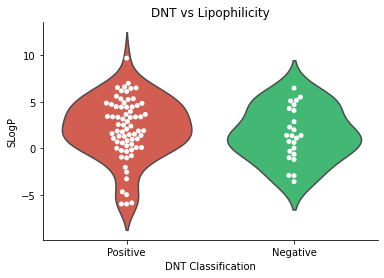

In [22]:
ax = sns.violinplot(x=dnt_slogp["DNT"], y=dnt_slogp["SLogP"], data=dnt_slogp, inner=None)
ax = sns.swarmplot(x=dnt_slogp["DNT"], y=dnt_slogp["SLogP"], data=dnt_slogp,
                   color="white", edgecolor="gray")
ax.set(ylabel='SLogP', xlabel='DNT Classification', title ='DNT vs Lipophilicity')
sns.despine(right=True, bottom = False)

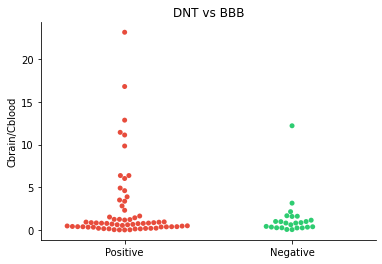

In [23]:
# DNT vs Cbrain/Cblood
replace_values_dnt_bbb = {0 : 'Negative', 1 : 'Positive'}
dnt_bbb = data.replace({"DNT": replace_values_dnt_bbb})
my_palette = ["#e74c3c", "#2ecc71"]
sns.set_palette(sns.color_palette(my_palette))
ax = sns.swarmplot(x=dnt_bbb["DNT"], y=dnt_bbb["Cbrain/Cblood"], data=dnt_bbb)
ax.set(ylabel='Cbrain/Cblood', xlabel=None, title ='DNT vs BBB')
sns.despine(right=True, bottom = False)

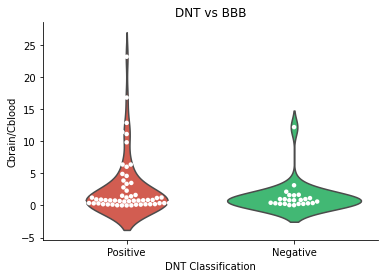

In [33]:
ax = sns.violinplot(x=dnt_bbb["DNT"], y=dnt_bbb["Cbrain/Cblood"], data=dnt_bbb, inner=None)
ax = sns.swarmplot(x=dnt_bbb["DNT"], y=dnt_bbb["Cbrain/Cblood"], data=dnt_bbb,
                   color="white", edgecolor="gray", s=4.5)
ax.set(ylabel='Cbrain/Cblood', xlabel='DNT Classification', title ='DNT vs BBB')
sns.despine(right=True, bottom = False)

### Missing values

In [34]:
#Table with percentage
data_new = data.drop(columns=['Chemical', 'CASRN'])
missing = (data_new.isnull().sum(0)/97)*100
df = round(missing)
df

DNT                 0.0
SLogP               2.0
BBB                 4.0
Cbrain/Cblood      10.0
Pgp_inhibition      6.0
Pgp_substrate       6.0
Pgp_active          6.0
BDNF, Reduction    62.0
Activity_Syn       31.0
Syn_EC30           31.0
Viability_EC30     31.0
Activity_NNF       11.0
NNF EC50min        11.0
NNF EC50max        11.0
Viability_LDH      19.0
dtype: float64

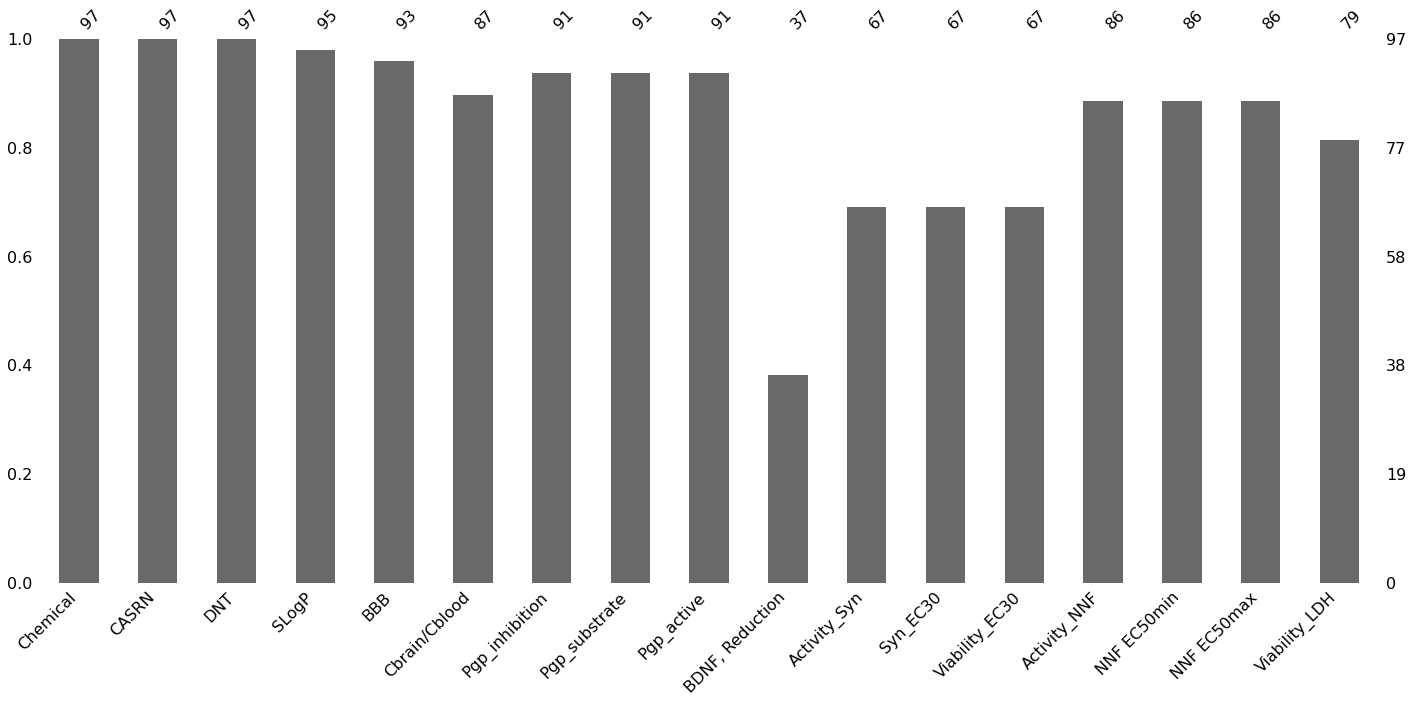

In [35]:
msno.bar(data);

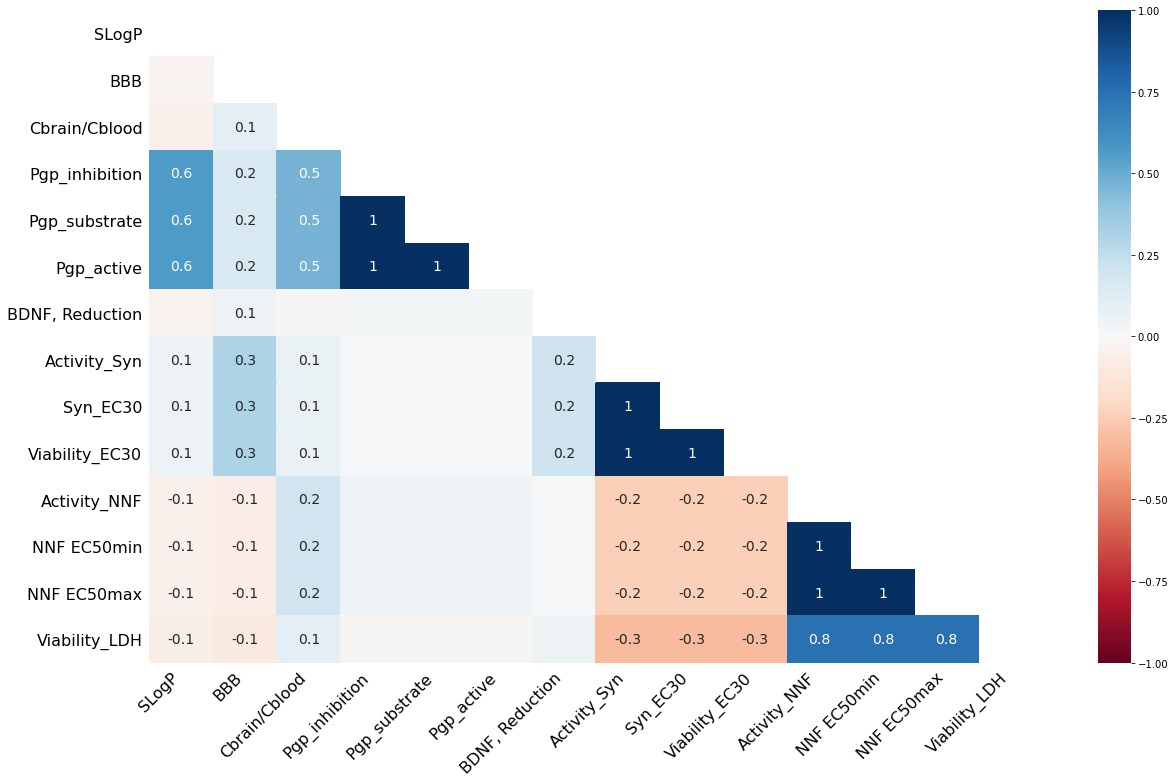

In [36]:
#Correlation heatmap 
#It measures nullity correlation
#How strongly the presence or absence of one variable affects the presence of another
msno.heatmap(data);

### Pairwise relationships

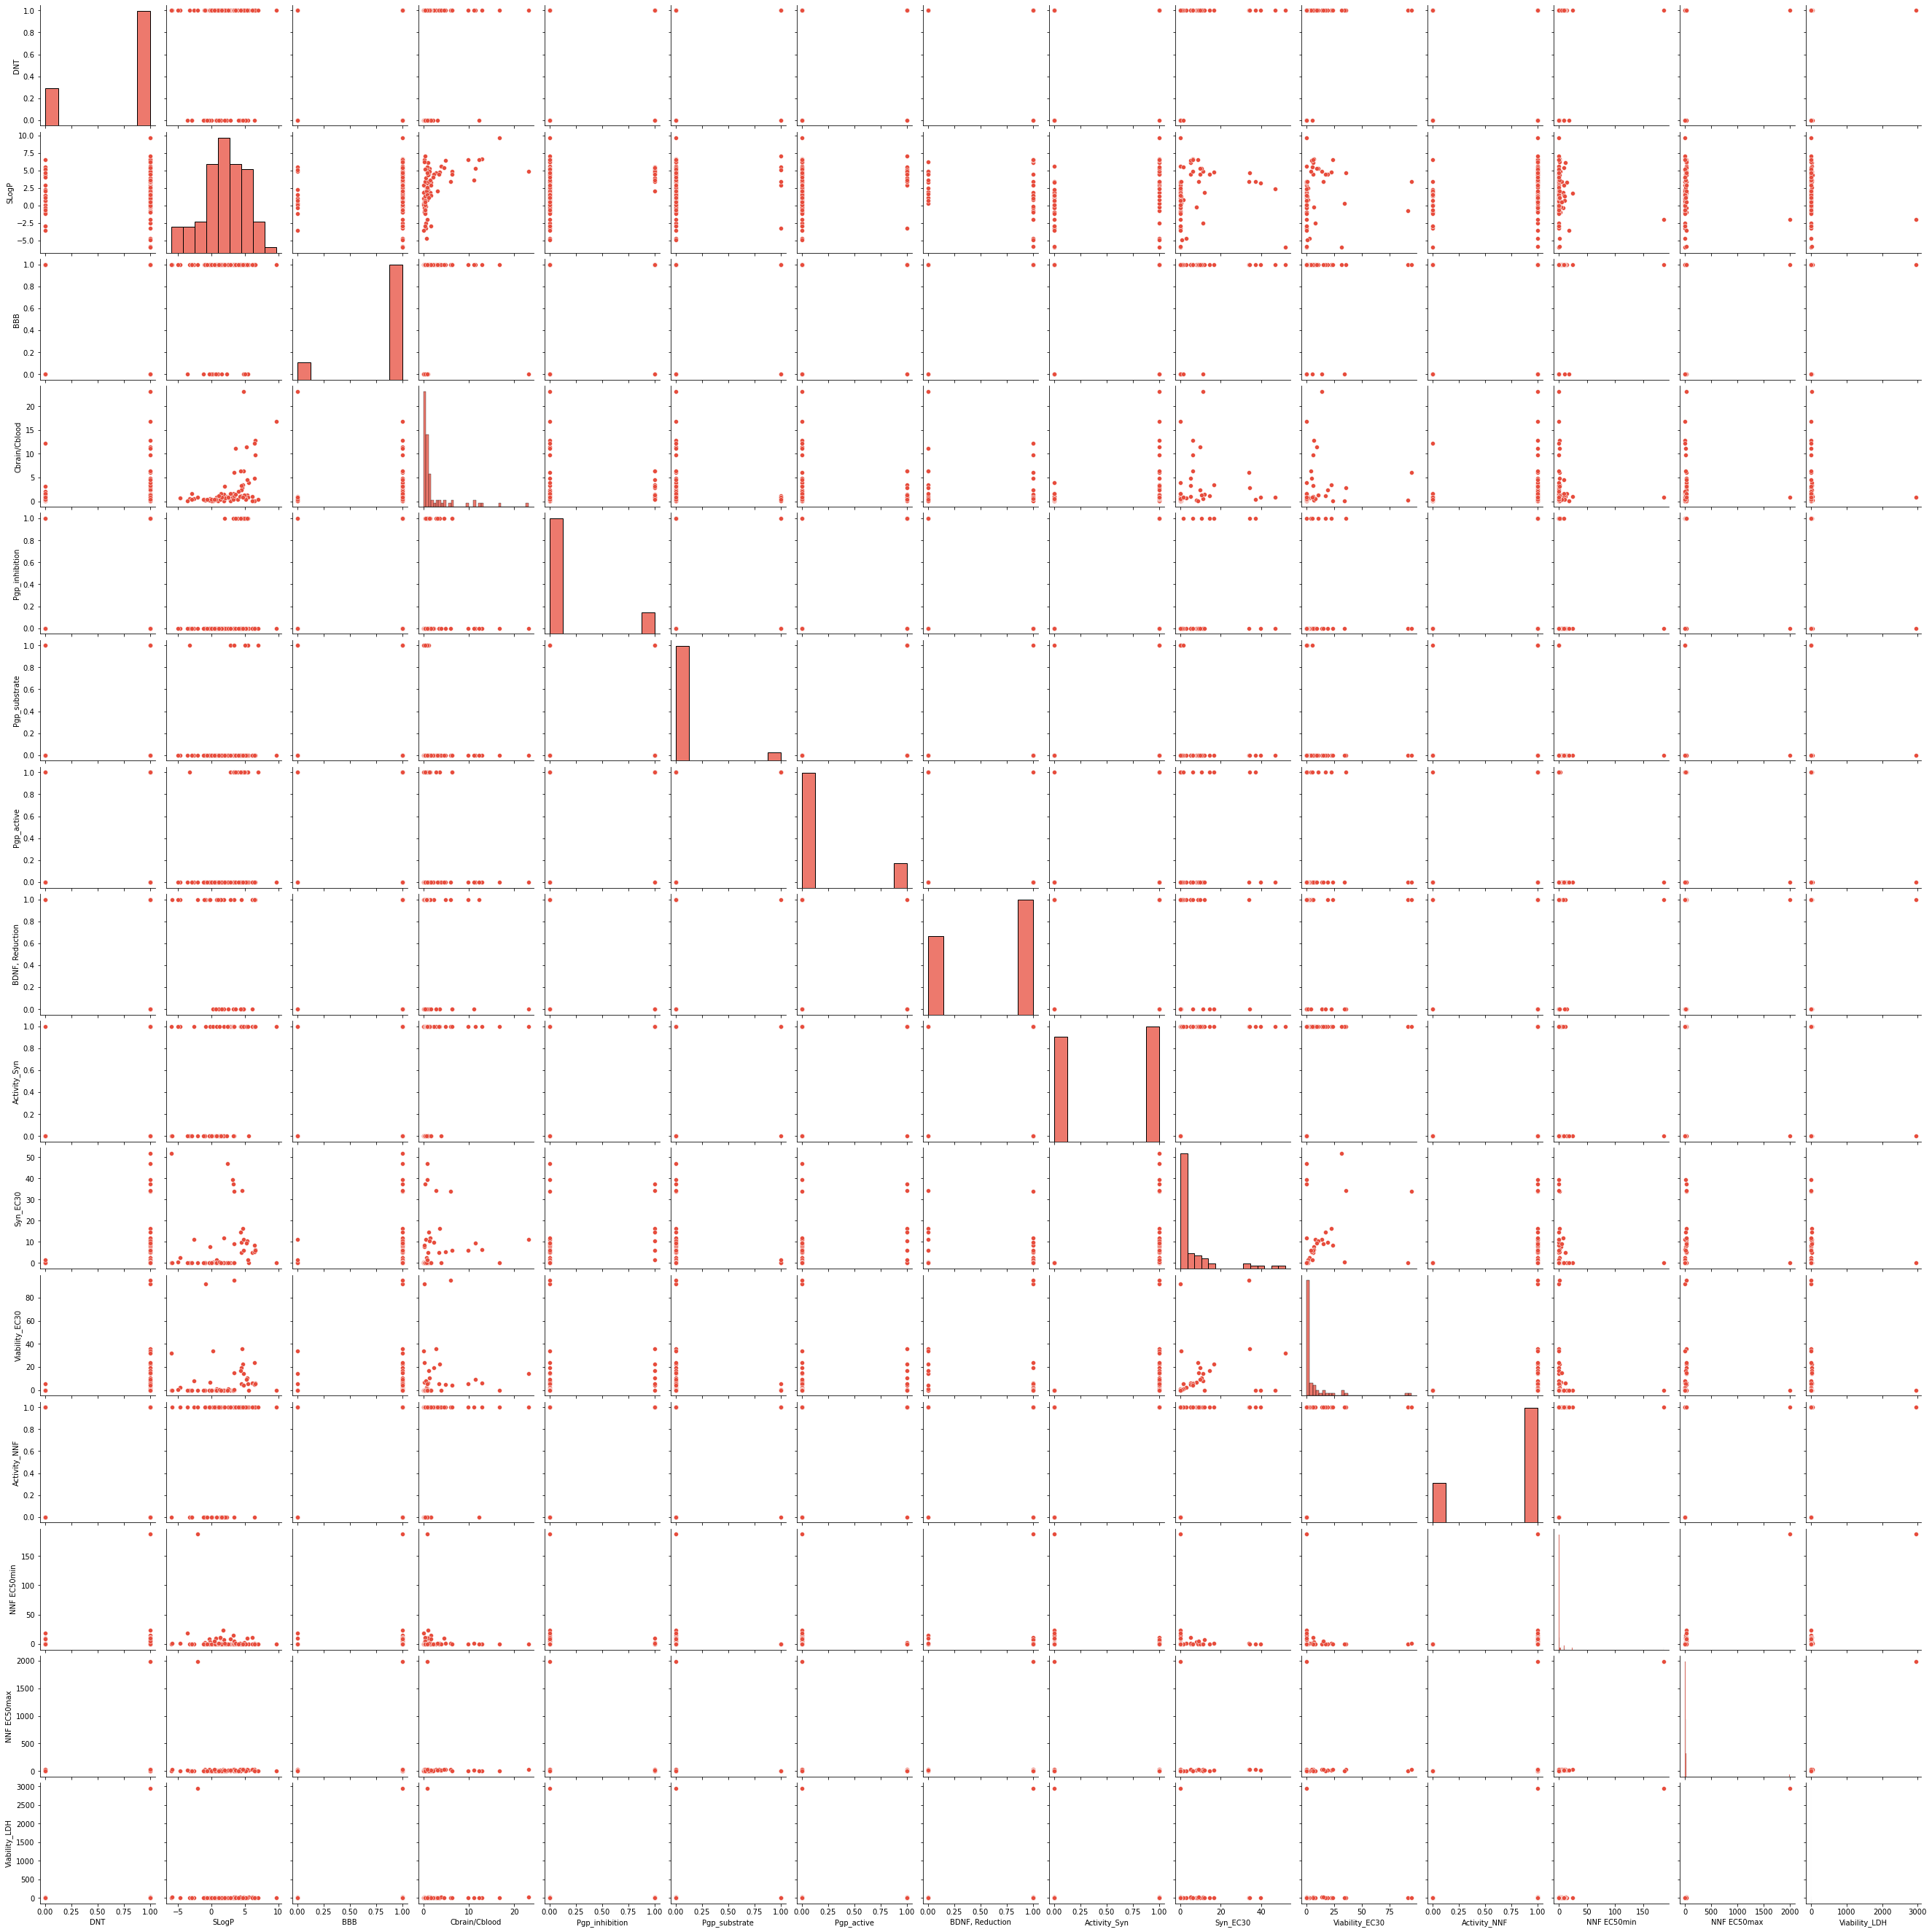

In [30]:
sns.pairplot(data);

### Correlation matrix

In [44]:
#Standardise continuous values
data_prep = data[['SLogP', 'Cbrain/Cblood','Syn_EC30', 
                  'Viability_EC30', 'NNF EC50min', 'NNF EC50max', 'Viability_LDH']]
sc = StandardScaler()
data_scaled = sc.fit_transform(data_prep)
data_scaled = pd.DataFrame(data_scaled)
data_scaled.columns = ['SLogP', 'Cbrain/Cblood','Syn_EC30', 
                       'Viability_EC30', 'NNF EC50min', 'NNF EC50max', 'Viability_LDH']

#Add other discrete values and details
discrete = data [['Chemical', 'CASRN', 'DNT', 'BBB', 'Pgp_inhibition', 'Pgp_substrate', 'Pgp_active', 
  'BDNF, Reduction', 'Activity_Syn', 'Activity_NNF']]
data = discrete.join(data_scaled, lsuffix="_left", rsuffix="_right")
data = data[['DNT', 'SLogP', 'Cbrain/Cblood', 'BBB', 'Pgp_inhibition', 'Pgp_substrate', 'Pgp_active', 'BDNF, Reduction', 'Activity_Syn', 'Syn_EC30', 
                       'Viability_EC30', 'Activity_NNF', 'NNF EC50min', 'NNF EC50max', 'Viability_LDH']]

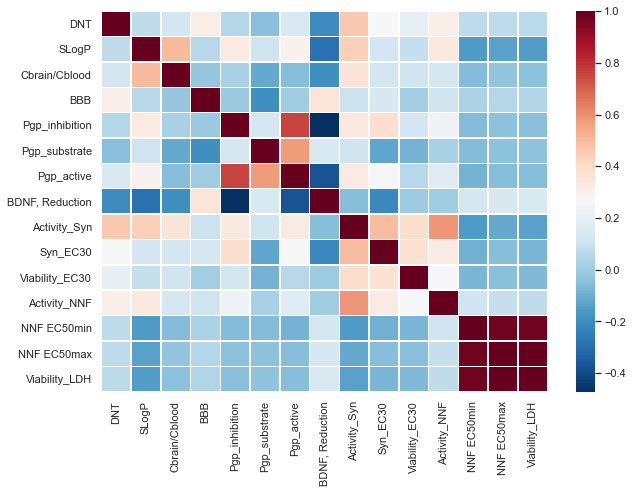

In [53]:
#Standardised
#This one used for manuscript
fig, ax = plt.subplots(figsize=(10,7))
pearsoncorr = data.corr(method='pearson')
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=False,
            linewidth=0.5);
#sns.set(font_scale=1)

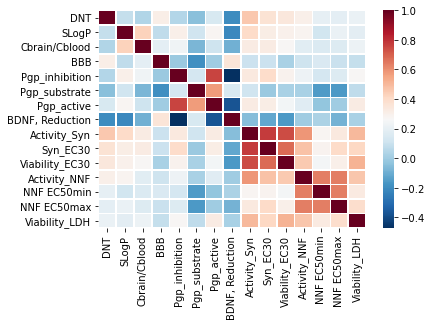

In [35]:
kendall = data.corr(method='kendall')
sns.heatmap(kendall, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=False,
            linewidth=0.5);

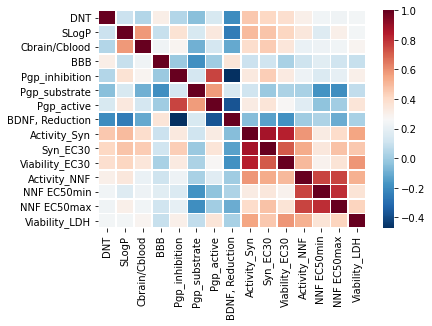

In [36]:
spearman = data.corr(method='spearman')
sns.heatmap(spearman, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=False,
            linewidth=0.5);

In [39]:
%load_ext watermark
%watermark -n -u -v -iv -w

pandas    1.1.1
missingno 0.4.2
numpy     1.19.1
seaborn   0.11.0
last updated: Wed Oct 07 2020 

CPython 3.8.5
IPython 7.18.1
watermark 2.0.2
